In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm #buat adaiin progress barnya 


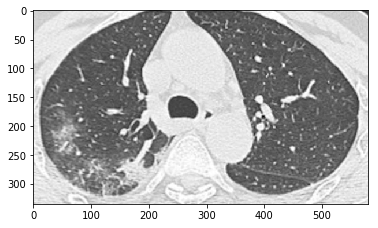

In [18]:
DATADIR = "Corona"

CATEGORIES = ["CT_COVID", "CT_NonCOVID"]

for category in CATEGORIES:  # iterasi covid dan non covid
    path = os.path.join(DATADIR,category)  # buat direktori covid dan covid
    for img in os.listdir(path):  # iterasi gambar covid dan non covid
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert ke array
        plt.imshow(img_array, cmap='gray')  
        plt.show()  # display!

        break  # untuk menampilkan satu maka perlu di break loopnya
    break  #untuk menampilkan satu maka perlu di break loopnya

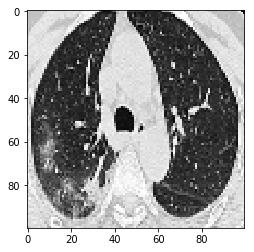

In [19]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [20]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # loop covid19 dan non covid19

        path = os.path.join(DATADIR,category)  # buat direktori covid19 dan non covid19
        class_num = CATEGORIES.index(category)  # buat klasifikasi  (0 or a 1). 0=covid 1=noncovid19

        for img in tqdm(os.listdir(path)):  # iterasi gambar covid dan non covid 19
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert ke array biar ringan 2d array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize ukuran data
                training_data.append([new_array, class_num])  # tambahkan ini ke training data
            except Exception as e:  # membuat ouput clean
                pass


create_training_data()

print(len(training_data))

100%|██████████| 397/397 [00:04<00:00, 86.15it/s]


747


In [21]:
import random

random.shuffle(training_data)

In [22]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
0
1
0
0
0


In [23]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)#karena grayscale

[[[[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [1]
   ...
   [0]
   [0]
   [0]]]]


In [24]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [26]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0 #normalisasi gambar dimana pada gambar min 0 maks 2555

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one 
#input tensor and one output tensor

model = Sequential() 
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu')) #gambar menggunakan relu untuk 0 smpai infinity
model.add(MaxPooling2D(pool_size=(2, 2)))
#buat 2 conv neural network
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # converts 2d menjadi 1D

model.add(Dense(64)) #untuk measure yg lebih baik 64 nodes

model.add(Dense(1))
model.add(Activation('sigmoid')) #sigmoid karena biner 0 atau 1 kayak logistic
#binary Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1). For each example, there should be a single floating-point value per prediction.
# adam karena "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
y = np.array(y)
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

C:\Users\budi\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 597 samples, validate on 150 samples
Epoch 1/10
597/597 [==============================] - 64s 108ms/sample - loss: 1.9982 - acc: 0.5193 - val_loss: 0.6557 - val_acc: 0.5800
Epoch 2/10
597/597 [==============================] - 64s 108ms/sample - loss: 0.5972 - acc: 0.6583 - val_loss: 0.5929 - val_acc: 0.6067
Epoch 3/10
597/597 [==============================] - 66s 110ms/sample - loss: 0.5262 - acc: 0.7270 - val_loss: 0.6200 - val_acc: 0.6600
Epoch 4/10
597/597 [==============================] - 70s 117ms/sample - loss: 0.4617 - acc: 0.7705 - val_loss: 0.5646 - val_acc: 0.6933
Epoch 5/10
597/597 [==============================] - 83s 138ms/sample - loss: 0.3907 - acc: 0.8040 - val_loss: 0.4996 - val_acc: 0.7533
Epoch 6/10
597/597 [==============================] - 63s